In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import numpy as np
from visualization import get_rmse, get_acc, get_seeps, get_cma, get_cpa, calculate_improvement_over_climatology, calculate_improvement_over_climatology_corr

In [2]:
def plot_metric(metric, input_dir):
    color_codes = sns.color_palette("colorblind", 6)
    model_color_map = {
        'Persistence': '#9467bd',
        'Climatology': color_codes[3],
        'GraphCast': color_codes[0],
        'IFS Mean': color_codes[1],
        'IFS HRES': color_codes[2]
        }
    plt.figure(figsize=(10, 6))
    
    # Create latitude array (assuming 91 latitudes from -90 to 90)
    lats = np.arange(-90, 90.2, 0.25)

    if metric == 'rmse':
        rmse_per_lats = get_rmse(input_dir)
        improvement_results = calculate_improvement_over_climatology(rmse_per_lats)
    elif metric == 'acc':
        acc_per_lats = get_acc(input_dir)
    elif metric == 'seeps':
        seeps_per_lats = get_seeps(input_dir)
    elif metric == 'cma_cpa':
        cma_per_lats = get_cma(input_dir)
        cpa_per_lats = get_cpa(input_dir)
        improvement_cma_results = calculate_improvement_over_climatology_corr(cma_per_lats)
        improvement_cpa_results = calculate_improvement_over_climatology_corr(cpa_per_lats)
    else:
        raise ValueError('metric not defined')
    

    if metric == 'rmse':
        for model_name, improvement in improvement_results.items():
            plt.plot(lats[8:-9], improvement[8:-9], label=model_name, color=model_color_map[model_name])
        plt.ylabel('RMSE Improvement (%)')
    elif metric == 'acc':
        for model_name, score in acc_per_lats.items():
            plt.plot(lats[8:-9], score[8:-9], label=model_name, color=model_color_map[model_name])
        plt.ylabel('ACC')
    elif metric == 'seeps':
        for model_name, score in seeps_per_lats.items():
            plt.plot(lats[8:-9], 1-score[8:-9], label=model_name, color=model_color_map[model_name])
        plt.ylabel('1-SEEPS')
        plt.ylim(-0.15, 1)
        plt.axhline(0, linestyle='-', color='black', alpha=0.3) 
    elif metric == 'cma_cpa':
        for model_name, improvement in improvement_cma_results.items():
            plt.plot(lats[8:-9], improvement[8:-9], label=model_name, color=model_color_map[model_name])

        for model_name, improvement in improvement_cpa_results.items():
            plt.plot(lats[8:-9], improvement[8:-9], linestyle = '--', label=model_name, color=model_color_map[model_name])

        plt.ylabel('Improvement (%)')
        legend_elements = []

        # Add a line for CMA/CPA explanation
        legend_elements.append(Line2D([0], [0], color='black', lw=2, linestyle='-', label='CMA Improvement'))
        legend_elements.append(Line2D([0], [0], color='black', lw=2, linestyle='--', label='CPA Improvement'))

        # Add a spacer/separator in the legend
        legend_elements.append(Line2D([0], [0], color='none', label=''))

        # Add color entries for each model
        for model_name in improvement_cma_results.keys():
            legend_elements.append(mpatches.Patch(color=model_color_map[model_name], label=model_name))
    else:
        raise ValueError('metric not defined')
    
    plt.xlabel('Latitude (degrees)') 
    plt.axvline(0, color='black', linestyle='--', alpha=0.3)  # Mark the equator
    plt.grid(True)

    if metric == 'cma_cpa':
        plt.legend(handles=legend_elements, 
            loc='best',
           frameon=True,
           framealpha=0.7)
    else:
        plt.legend()
    plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], 
           [ '80°S', '60°S','40°S' ,'20°S', 'Equator', 
            '20°N', '40°N', '60°N', '80°N'])

    plt.tight_layout()

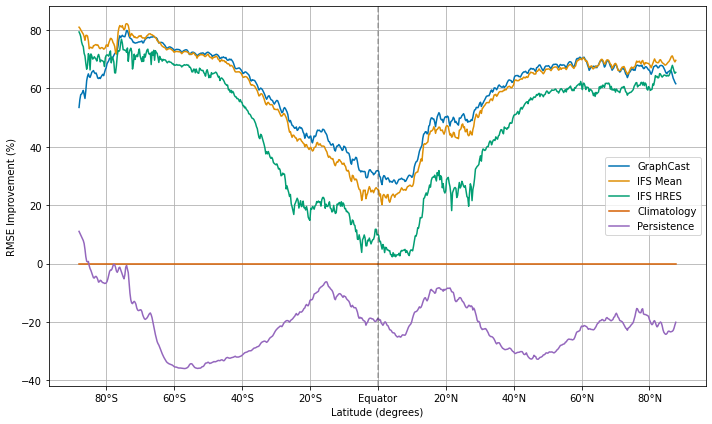

In [3]:
metric = 'rmse'
input_dir = './rmse_results/'
plot_metric(metric, input_dir)

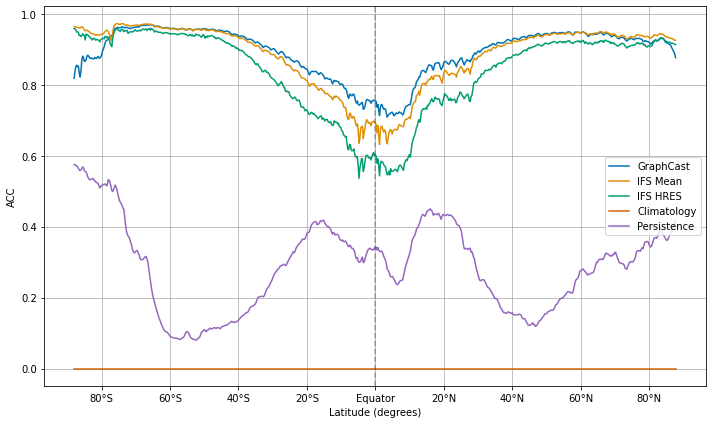

In [4]:
metric = 'acc'
input_dir = './acc_results/'
plot_metric(metric, input_dir)

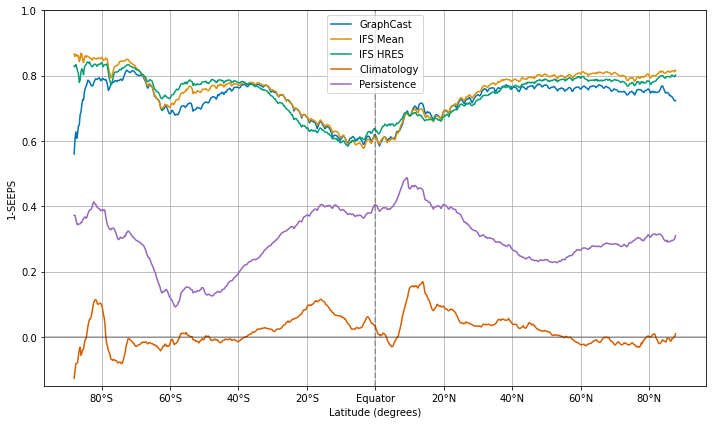

In [5]:
metric = 'seeps'
input_dir = './seeps_results/'
plot_metric(metric, input_dir)

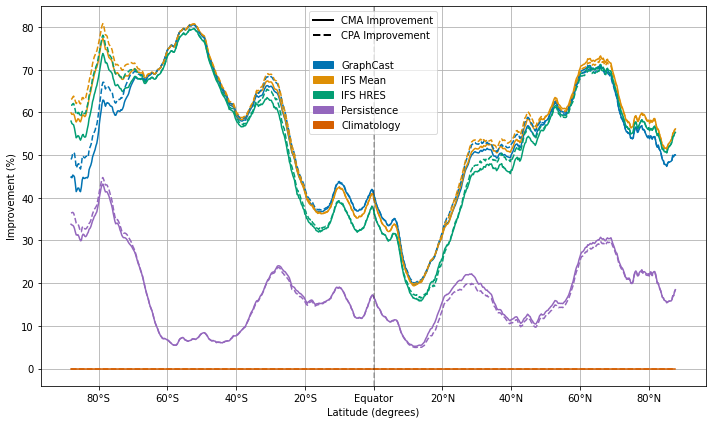

In [6]:
metric = 'cma_cpa'
input_dir = './cma_cpa_results/'
plot_metric(metric, input_dir)